In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv('total_sales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
df.shape

(186850, 6)

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [7]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [8]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
# Change Data Type of Quantity , Price

In [10]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [11]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df = df.dropna(subset=['Quantity Ordered']) 
df = df.dropna(subset=['Price Each']) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.9+ MB


In [13]:
# Change date in Datetime format

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

In [15]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Year              185950 non-null  int32         
 7   Month             185950 non-null  int32         
 8   Day               185950 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 12.1+ MB


In [17]:
# Now we will analyze :
##Sales Per Product
## Sales per Month/Product
## Sales Per Year/Product
## Top 5 Selling Products
## Top 5 Selling products performance Month wise

In [18]:
df['Sales']=df['Quantity Ordered']*df['Price Each']

In [19]:
# Extract month and year for grouping
df['Year-Month'] = df['Order Date'].dt.to_period('M')

In [20]:
# Group by 'Year-Month' and 'Product', then calculate total sales per month per product
monthly_sales = df.groupby(['Year-Month', 'Product'])['Sales'].sum().reset_index()

In [21]:
print(monthly_sales)

    Year-Month                 Product      Sales
0      2019-01            20in Monitor   23647.85
1      2019-01  27in 4K Gaming Monitor  121676.88
2      2019-01        27in FHD Monitor   62845.81
3      2019-01  34in Ultrawide Monitor  119316.86
4      2019-01   AA Batteries (4-pack)    5468.16
..         ...                     ...        ...
238    2020-01         ThinkPad Laptop    1999.98
239    2020-01    USB-C Charging Cable      47.80
240    2020-01         Vareebadd Phone     400.00
241    2020-01        Wired Headphones      47.96
242    2020-01                  iPhone    1400.00

[243 rows x 3 columns]


In [22]:
# Group by 'Year' then calculate total sales per year per product
yearly_sales = df.groupby(['Year'])['Sales'].sum()

In [23]:
print(yearly_sales)

Year
2019    34483365.68
2020        8670.29
Name: Sales, dtype: float64


In [27]:
# Group by 'Year' and 'Product' then calculate total sales per year per product
product_yearly_sales = df.groupby(['Year', 'Product'])['Sales'].sum().reset_index()

In [29]:
print(product_yearly_sales)

    Year                     Product       Sales
0   2019                20in Monitor   453818.74
1   2019      27in 4K Gaming Monitor  2434707.57
2   2019            27in FHD Monitor  1131974.53
3   2019      34in Ultrawide Monitor  2355558.01
4   2019       AA Batteries (4-pack)   106118.40
5   2019      AAA Batteries (4-pack)    92725.88
6   2019    Apple Airpods Headphones  2348550.00
7   2019  Bose SoundSport Headphones  1345265.46
8   2019               Flatscreen TV  1445400.00
9   2019                Google Phone  3318600.00
10  2019                    LG Dryer   387600.00
11  2019          LG Washing Machine   399600.00
12  2019    Lightning Charging Cable   347004.45
13  2019          Macbook Pro Laptop  8035900.00
14  2019             ThinkPad Laptop  4127958.72
15  2019        USB-C Charging Cable   286453.45
16  2019             Vareebadd Phone   826800.00
17  2019            Wired Headphones   246430.47
18  2019                      iPhone  4792900.00
19  2020            

In [31]:
# Group by 'Month' and 'Product' then calculate total sales per year per product
product_monthly_sales = df.groupby(['Month', 'Product'])['Sales'].sum().reset_index()

In [33]:
print(product_monthly_sales)

     Month                 Product      Sales
0        1            20in Monitor   23977.82
1        1  27in 4K Gaming Monitor  122066.87
2        1        27in FHD Monitor   63295.78
3        1  34in Ultrawide Monitor  119316.86
4        1   AA Batteries (4-pack)    5468.16
..     ...                     ...        ...
223     12         ThinkPad Laptop  538994.61
224     12    USB-C Charging Cable   38837.50
225     12         Vareebadd Phone  113600.00
226     12        Wired Headphones   32960.51
227     12                  iPhone  634200.00

[228 rows x 3 columns]


In [35]:
# Extract month and year for grouping
df['Year-Month'] = df['Order Date'].dt.to_period('M')  # This creates a Year-Month column

# Group by 'Year-Month' and 'Product', then calculate total sales per month per product
year_monthly_sales = df.groupby(['Year-Month', 'Product'])['Sales'].sum().reset_index()

In [37]:

print(year_monthly_sales)

    Year-Month                 Product      Sales
0      2019-01            20in Monitor   23647.85
1      2019-01  27in 4K Gaming Monitor  121676.88
2      2019-01        27in FHD Monitor   62845.81
3      2019-01  34in Ultrawide Monitor  119316.86
4      2019-01   AA Batteries (4-pack)    5468.16
..         ...                     ...        ...
238    2020-01         ThinkPad Laptop    1999.98
239    2020-01    USB-C Charging Cable      47.80
240    2020-01         Vareebadd Phone     400.00
241    2020-01        Wired Headphones      47.96
242    2020-01                  iPhone    1400.00

[243 rows x 3 columns]


In [43]:

# Group by 'Product' and sum up the sales
product_sales = df.groupby('Product')['Sales'].sum()

# Sort by sales in descending order and get the top 5
top_5_products = product_sales.sort_values(ascending=False).head(5)

In [45]:
print(top_5_products)

Product
Macbook Pro Laptop        8037600.00
iPhone                    4794300.00
ThinkPad Laptop           4129958.70
Google Phone              3319200.00
27in 4K Gaming Monitor    2435097.56
Name: Sales, dtype: float64


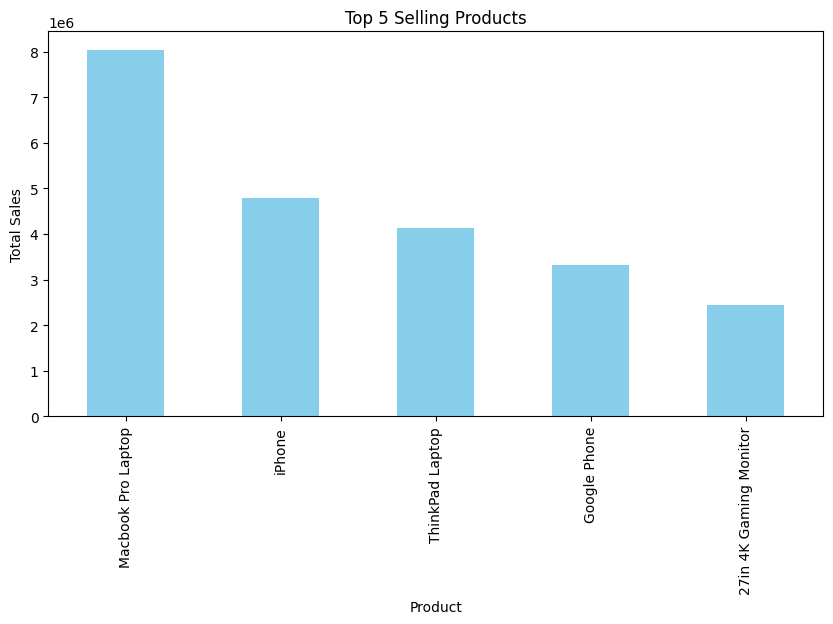

In [47]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
top_5_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

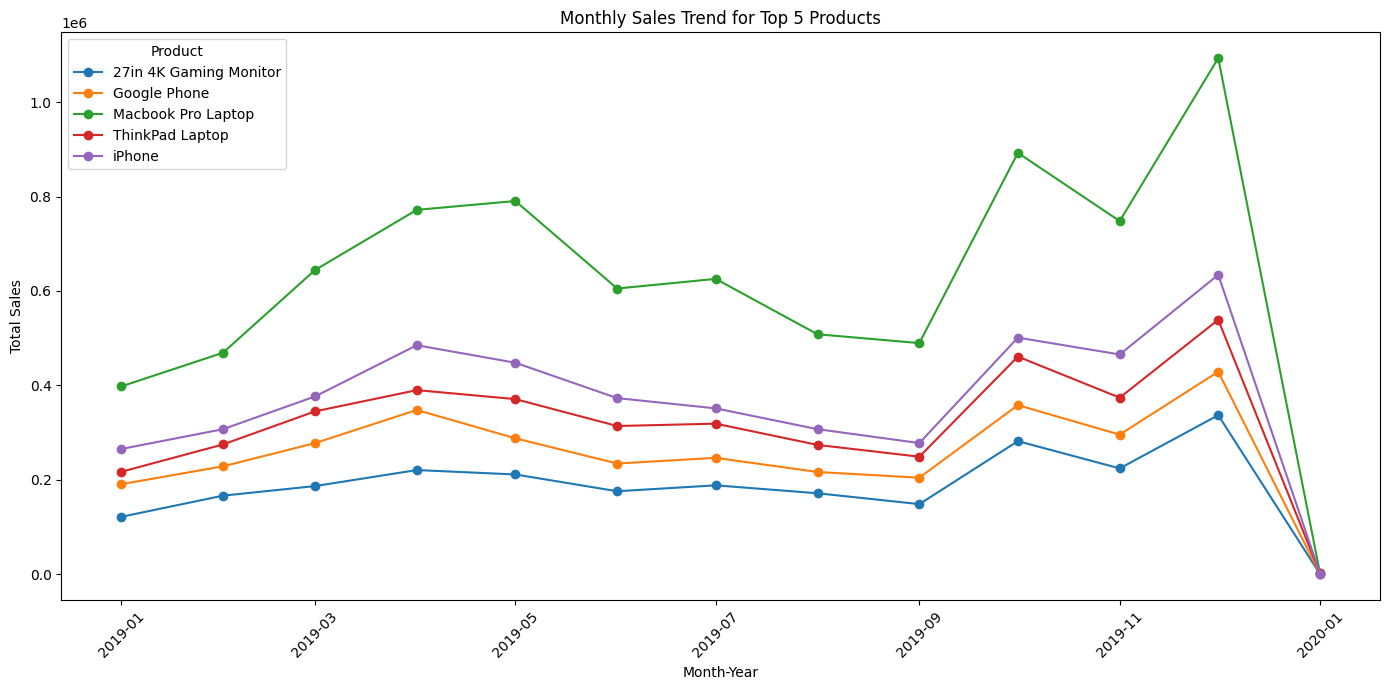

In [63]:
import matplotlib.pyplot as plt

# Identify top 5 products based on total sales
top_5_products = df.groupby('Product')['Sales'].sum().nlargest(5).index

# Filter data for only the top 5 products
df_top_products = df[df['Product'].isin(top_5_products)]

# Group by 'Month-Year' and 'Product' to get monthly sales trend for each top product
monthly_sales_trend = df_top_products.groupby(['Month-Year', 'Product'])['Sales'].sum().unstack().fillna(0)

# Plotting the monthly trend for each top product
plt.figure(figsize=(14, 7))
for product in monthly_sales_trend.columns:
    plt.plot(monthly_sales_trend.index.to_timestamp(), monthly_sales_trend[product], label=product, marker='o')

plt.title('Monthly Sales Trend for Top 5 Products')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
